In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/TRAIN.csv")

In [3]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


<AxesSubplot:xlabel='category', ylabel='count'>

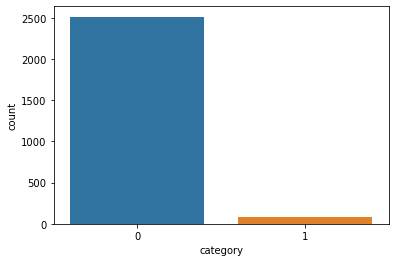

In [4]:
sns.countplot(x='category',data=df)

Its highly imbalanced

In [14]:
X = df['text']
y = df['category']

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.29      0.45        17

    accuracy                           0.98       520
   macro avg       0.99      0.65      0.72       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Logistic Regression is 0.6470588235294118
f1_score: 0.9707653839284488
Model:LogisticRegression() using TfidfVectorizer(max_df=0.91, min_df=0.01)


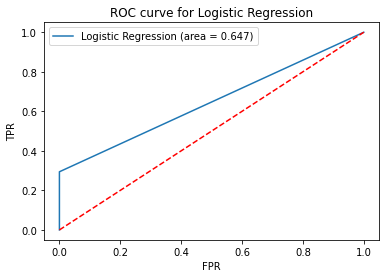

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.67      0.35      0.46        17

    accuracy                           0.97       520
   macro avg       0.82      0.67      0.72       520
weighted avg       0.97      0.97      0.97       520

ROC_AUC_SCORE for Decision Tree is 0.6734884808794294
f1_score: 0.9690411166742529
Model:DecisionTreeClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


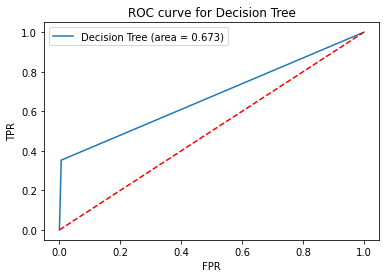

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.29      0.45        17

    accuracy                           0.98       520
   macro avg       0.99      0.65      0.72       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Random Forest is 0.6470588235294118
f1_score: 0.9707653839284488
Model:RandomForestClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


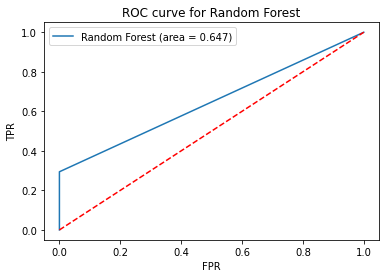

XGBOOST

[22:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       0.88      0.41      0.56        17

    accuracy                           0.98       520
   macro avg       0.93      0.70      0.77       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for XGBoost is 0.7048883171558882
f1_score: 0.9751322470632815
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

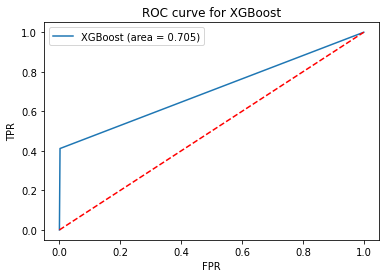

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.70      0.41      0.52        17

    accuracy                           0.97       520
   macro avg       0.84      0.70      0.75       520
weighted avg       0.97      0.97      0.97       520

ROC_AUC_SCORE for Gradient Boosting is 0.7029002455853116
f1_score: 0.9718456363569888
Model:GradientBoostingClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


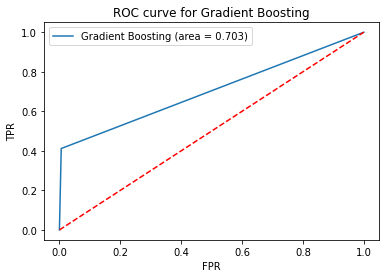

MULTINOMIALNB

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       503
           1       1.00      0.12      0.21        17

    accuracy                           0.97       520
   macro avg       0.99      0.56      0.60       520
weighted avg       0.97      0.97      0.96       520

ROC_AUC_SCORE for MultinomialNB is 0.5588235294117647
f1_score: 0.95997910280863
Model:MultinomialNB() using TfidfVectorizer(max_df=0.91, min_df=0.01)


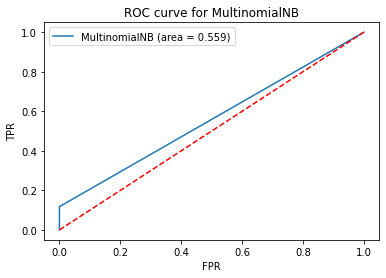

GAUSSIANNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       503
           1       0.19      0.76      0.31        17

    accuracy                           0.89       520
   macro avg       0.59      0.83      0.62       520
weighted avg       0.96      0.89      0.92       520

ROC_AUC_SCORE for GaussianNB is 0.8276809729856158
f1_score: 0.9175473217881596
Model:GaussianNB() using TfidfVectorizer(max_df=0.91, min_df=0.01)


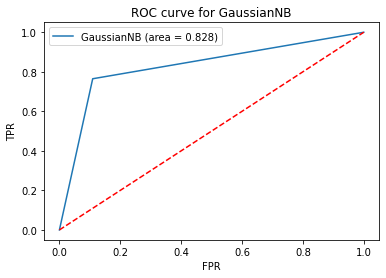

SGDCLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.75      0.71      0.73        17

    accuracy                           0.98       520
   macro avg       0.87      0.85      0.86       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for SGDClassifier is 0.8489650333294352
f1_score: 0.9824386636203916
Model:SGDClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


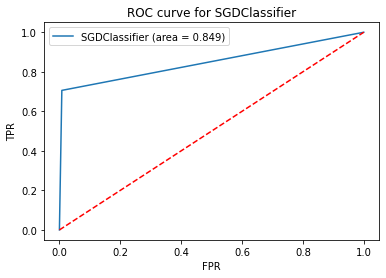

PASSIVEAGGRESSIVECLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       0.83      0.59      0.69        17

    accuracy                           0.98       520
   macro avg       0.91      0.79      0.84       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for PassiveAggressiveClassifier is 0.792129575488247
f1_score: 0.9812430636998323
Model:PassiveAggressiveClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


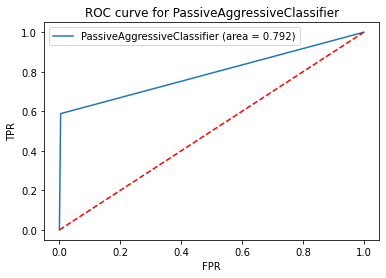

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       0.91      0.59      0.71        17

    accuracy                           0.98       520
   macro avg       0.95      0.79      0.85       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for Logistic Regression is 0.7931236112735354
f1_score: 0.9830126395343787
Model:LogisticRegression() using CountVectorizer(max_df=0.91, min_df=0.01)


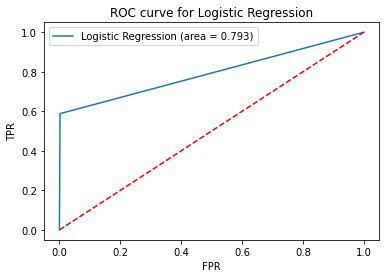

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       503
           1       0.48      0.65      0.55        17

    accuracy                           0.97       520
   macro avg       0.73      0.81      0.77       520
weighted avg       0.97      0.97      0.97       520

ROC_AUC_SCORE for Decision Tree is 0.8116009823412467
f1_score: 0.9678769230769231
Model:DecisionTreeClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


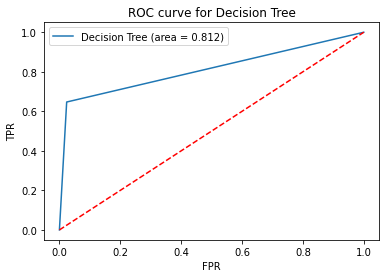

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.35      0.52        17

    accuracy                           0.98       520
   macro avg       0.99      0.68      0.76       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Random Forest is 0.6764705882352942
f1_score: 0.9739020267492756
Model:RandomForestClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


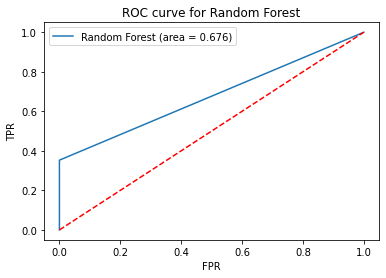

XGBOOST

[22:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       0.82      0.53      0.64        17

    accuracy                           0.98       520
   macro avg       0.90      0.76      0.82       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for XGBoost is 0.7627178107823646
f1_score: 0.9787657994179734
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

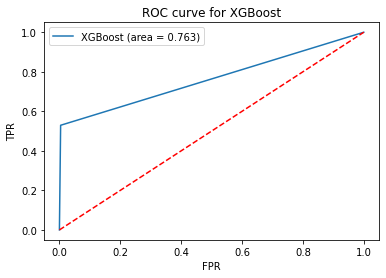

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.73      0.47      0.57        17

    accuracy                           0.98       520
   macro avg       0.85      0.73      0.78       520
weighted avg       0.97      0.98      0.97       520

ROC_AUC_SCORE for Gradient Boosting is 0.7323120102911941
f1_score: 0.974518959301568
Model:GradientBoostingClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


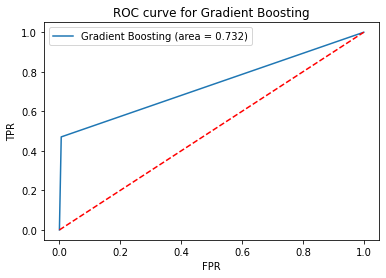

MULTINOMIALNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.81      0.76      0.79        17

    accuracy                           0.99       520
   macro avg       0.90      0.88      0.89       520
weighted avg       0.99      0.99      0.99       520

ROC_AUC_SCORE for MultinomialNB is 0.8793708338206058
f1_score: 0.9863411828158601
Model:MultinomialNB() using CountVectorizer(max_df=0.91, min_df=0.01)


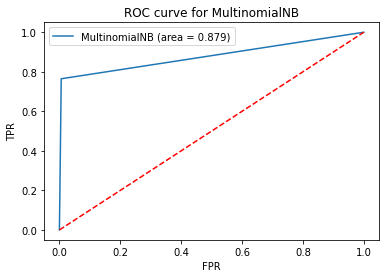

GAUSSIANNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       503
           1       0.19      0.76      0.31        17

    accuracy                           0.89       520
   macro avg       0.59      0.83      0.62       520
weighted avg       0.96      0.89      0.92       520

ROC_AUC_SCORE for GaussianNB is 0.8276809729856158
f1_score: 0.9175473217881596
Model:GaussianNB() using CountVectorizer(max_df=0.91, min_df=0.01)


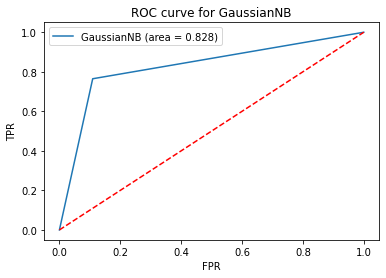

SGDCLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.80      0.71      0.75        17

    accuracy                           0.98       520
   macro avg       0.90      0.85      0.87       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for SGDClassifier is 0.8499590691147236
f1_score: 0.9841498778998778
Model:SGDClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


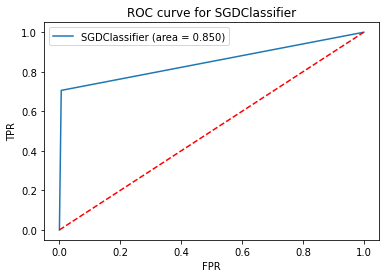

PASSIVEAGGRESSIVECLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.69      0.65      0.67        17

    accuracy                           0.98       520
   macro avg       0.84      0.82      0.83       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for PassiveAggressiveClassifier is 0.8185592328382645
f1_score: 0.978536144424923
Model:PassiveAggressiveClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


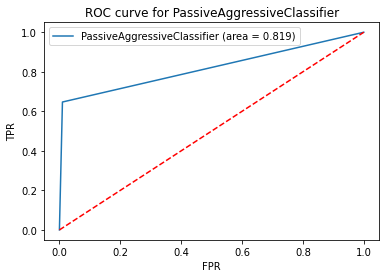

In [17]:
# Predictors
# X = cleaned_data.drop('y', axis=1)

def run_model(X,y):

    X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


    models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,
          'Gradient Boosting':GradientBoostingClassifier,
          'MultinomialNB':MultinomialNB,'GaussianNB':GaussianNB,'SGDClassifier':SGDClassifier,'PassiveAggressiveClassifier':PassiveAggressiveClassifier}

    vectorizers = [TfidfVectorizer,CountVectorizer]
    for vectorizer in vectorizers:
        vector = vectorizer(max_df=0.91, min_df=0.01)
    
    ## vectorization
        X_train_vector = vector.fit_transform(X_train).toarray()
        X_test_vector =  vector.transform(X_test).toarray()
        for i in models.items():
            print(i[0].upper())
            print()
    
            model = i[1]()

            model.fit(X_train_vector, y_train)
    
            y_predicted = model.predict(X_test_vector)
    
            auc = roc_auc_score(y_test, y_predicted)
    
            print('Classification Report:')
            print(classification_report(y_test,y_predicted))
    
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
            score = f1_score(y_test,y_predicted,average="weighted")
            print('ROC_AUC_SCORE for '+i[0]+' is',roc_auc_score(y_test, y_predicted))
            print(f'f1_score: {score}')
            print(f"Model:{model} using {vector}")
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
            plt.plot(false_positive_rate, true_positive_rate, label= i[0]+' (area = %0.03f)' % auc)
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlabel('FPR')
            plt.ylabel('TPR')
            plt.legend(loc="upper left")
            plt.title('ROC curve for '+i[0])
            plt.show()
            print("="*60)
run_model(X,y)

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.29      0.45        17

    accuracy                           0.98       520
   macro avg       0.99      0.65      0.72       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Logistic Regression is 0.6470588235294118
f1_score: 0.9707653839284488
Model:LogisticRegression() using TfidfVectorizer(max_df=0.91, min_df=0.01)


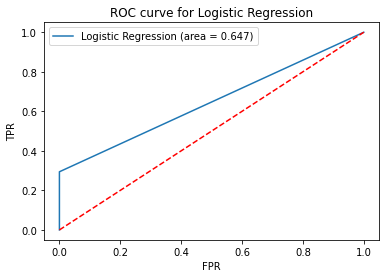

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       0.86      0.35      0.50        17

    accuracy                           0.98       520
   macro avg       0.92      0.68      0.74       520
weighted avg       0.97      0.98      0.97       520

ROC_AUC_SCORE for Decision Tree is 0.6754765524500058
f1_score: 0.972228952150212
Model:DecisionTreeClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


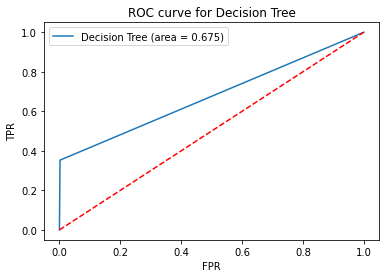

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.35      0.52        17

    accuracy                           0.98       520
   macro avg       0.99      0.68      0.76       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Random Forest is 0.6764705882352942
f1_score: 0.9739020267492756
Model:RandomForestClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


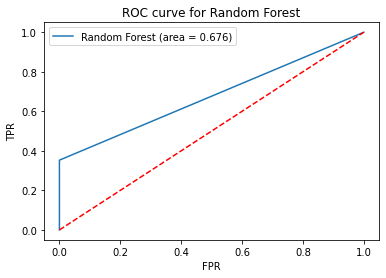

XGBOOST

[22:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       0.88      0.41      0.56        17

    accuracy                           0.98       520
   macro avg       0.93      0.70      0.77       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for XGBoost is 0.7048883171558882
f1_score: 0.9751322470632815
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

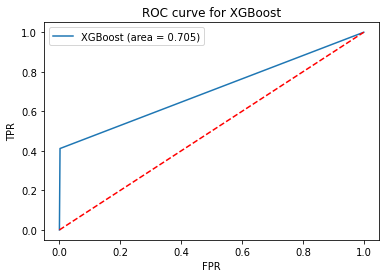

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.70      0.41      0.52        17

    accuracy                           0.97       520
   macro avg       0.84      0.70      0.75       520
weighted avg       0.97      0.97      0.97       520

ROC_AUC_SCORE for Gradient Boosting is 0.7029002455853116
f1_score: 0.9718456363569888
Model:GradientBoostingClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


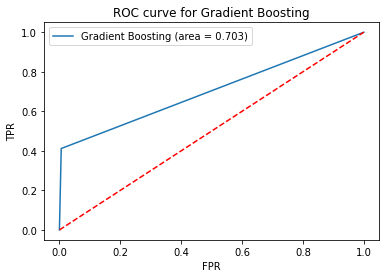

MULTINOMIALNB

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       503
           1       1.00      0.12      0.21        17

    accuracy                           0.97       520
   macro avg       0.99      0.56      0.60       520
weighted avg       0.97      0.97      0.96       520

ROC_AUC_SCORE for MultinomialNB is 0.5588235294117647
f1_score: 0.95997910280863
Model:MultinomialNB() using TfidfVectorizer(max_df=0.91, min_df=0.01)


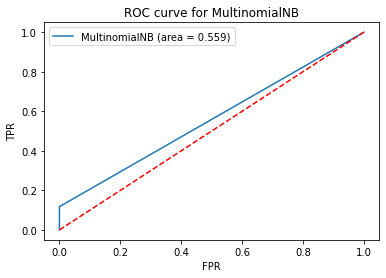

GAUSSIANNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       503
           1       0.19      0.76      0.31        17

    accuracy                           0.89       520
   macro avg       0.59      0.83      0.62       520
weighted avg       0.96      0.89      0.92       520

ROC_AUC_SCORE for GaussianNB is 0.8276809729856158
f1_score: 0.9175473217881596
Model:GaussianNB() using TfidfVectorizer(max_df=0.91, min_df=0.01)


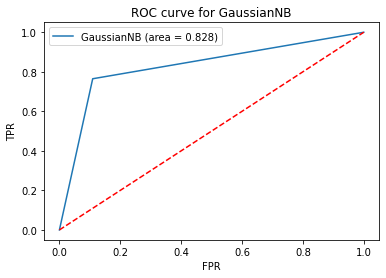

SGDCLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       1.00      0.59      0.74        17

    accuracy                           0.99       520
   macro avg       0.99      0.79      0.87       520
weighted avg       0.99      0.99      0.98       520

ROC_AUC_SCORE for SGDClassifier is 0.7941176470588236
f1_score: 0.9848399580383786
Model:SGDClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


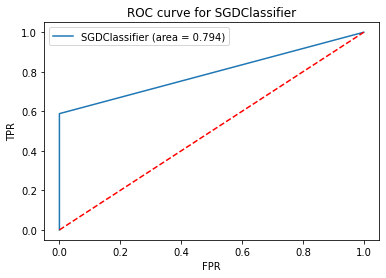

PASSIVEAGGRESSIVECLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       0.92      0.65      0.76        17

    accuracy                           0.99       520
   macro avg       0.95      0.82      0.88       520
weighted avg       0.99      0.99      0.99       520

ROC_AUC_SCORE for PassiveAggressiveClassifier is 0.8225353759794175
f1_score: 0.9854112717665362
Model:PassiveAggressiveClassifier() using TfidfVectorizer(max_df=0.91, min_df=0.01)


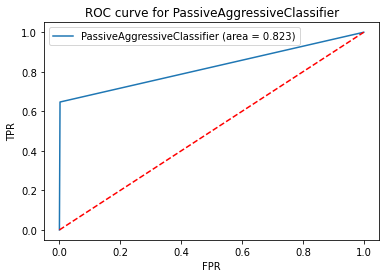

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       0.91      0.59      0.71        17

    accuracy                           0.98       520
   macro avg       0.95      0.79      0.85       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for Logistic Regression is 0.7931236112735354
f1_score: 0.9830126395343787
Model:LogisticRegression() using CountVectorizer(max_df=0.91, min_df=0.01)


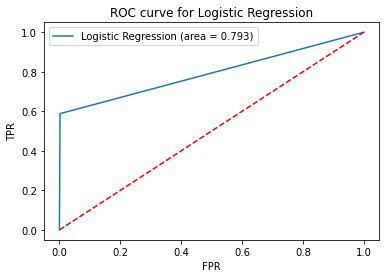

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.61      0.65      0.63        17

    accuracy                           0.97       520
   macro avg       0.80      0.82      0.81       520
weighted avg       0.98      0.97      0.98       520

ROC_AUC_SCORE for Decision Tree is 0.816571161267688
f1_score: 0.9753447050461975
Model:DecisionTreeClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


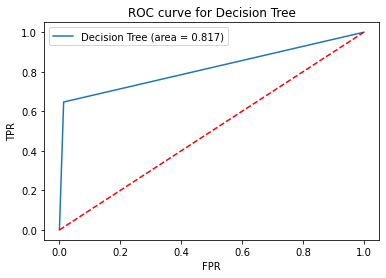

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       1.00      0.35      0.52        17

    accuracy                           0.98       520
   macro avg       0.99      0.68      0.76       520
weighted avg       0.98      0.98      0.97       520

ROC_AUC_SCORE for Random Forest is 0.6764705882352942
f1_score: 0.9739020267492756
Model:RandomForestClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


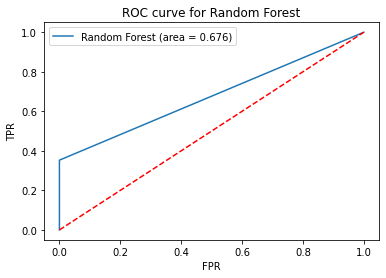

XGBOOST

[22:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       503
           1       0.82      0.53      0.64        17

    accuracy                           0.98       520
   macro avg       0.90      0.76      0.82       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for XGBoost is 0.7627178107823646
f1_score: 0.9787657994179734
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, v

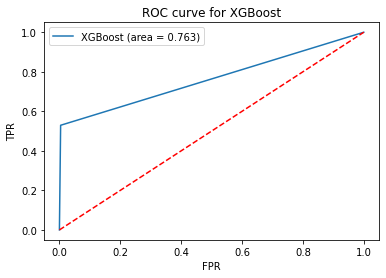

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       0.73      0.47      0.57        17

    accuracy                           0.98       520
   macro avg       0.85      0.73      0.78       520
weighted avg       0.97      0.98      0.97       520

ROC_AUC_SCORE for Gradient Boosting is 0.7323120102911941
f1_score: 0.974518959301568
Model:GradientBoostingClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


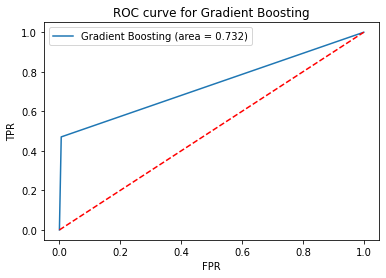

MULTINOMIALNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.81      0.76      0.79        17

    accuracy                           0.99       520
   macro avg       0.90      0.88      0.89       520
weighted avg       0.99      0.99      0.99       520

ROC_AUC_SCORE for MultinomialNB is 0.8793708338206058
f1_score: 0.9863411828158601
Model:MultinomialNB() using CountVectorizer(max_df=0.91, min_df=0.01)


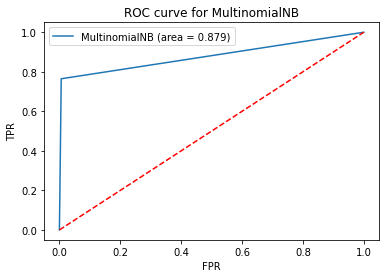

GAUSSIANNB

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       503
           1       0.19      0.76      0.31        17

    accuracy                           0.89       520
   macro avg       0.59      0.83      0.62       520
weighted avg       0.96      0.89      0.92       520

ROC_AUC_SCORE for GaussianNB is 0.8276809729856158
f1_score: 0.9175473217881596
Model:GaussianNB() using CountVectorizer(max_df=0.91, min_df=0.01)


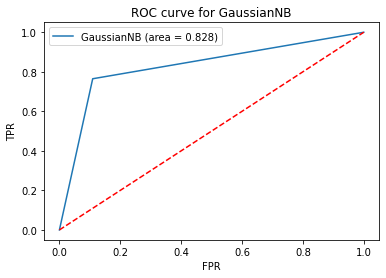

SGDCLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.65      0.65      0.65        17

    accuracy                           0.98       520
   macro avg       0.82      0.82      0.82       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for SGDClassifier is 0.8175651970529763
f1_score: 0.9769230769230769
Model:SGDClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


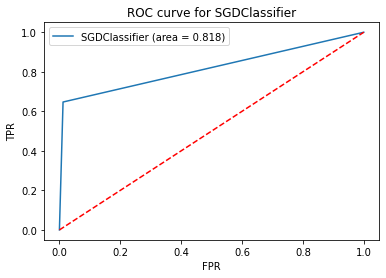

PASSIVEAGGRESSIVECLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       503
           1       0.65      0.65      0.65        17

    accuracy                           0.98       520
   macro avg       0.82      0.82      0.82       520
weighted avg       0.98      0.98      0.98       520

ROC_AUC_SCORE for PassiveAggressiveClassifier is 0.8175651970529763
f1_score: 0.9769230769230769
Model:PassiveAggressiveClassifier() using CountVectorizer(max_df=0.91, min_df=0.01)


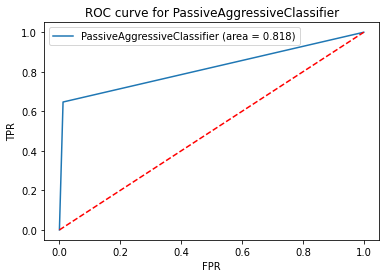

In [13]:
# Predictors
# X = cleaned_data.drop('y', axis=1)
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

X = df['text']


# Target
y = df['category']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# vector = TfidfVectorizer(max_df=0.91, min_df=0.01)
    
#     ## vectorization
 
# X_train_vector = vector.fit_transform(X_train).toarray()
# X_test_vector =  vector.transform(X_test).toarray()
    
#     #model training and prediction
#     model.fit(X_train_vector,y_train)
#     prediction = model.predict(X_test_vector)

# Choosing the models
# models = [MultinomialNB(), GaussianNB(),LogisticRegression(),SGDClassifier(), RandomForestClassifier(),PassiveAggressiveClassifier(),XGBClassifier()]

models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,
          'Gradient Boosting':GradientBoostingClassifier,
          'MultinomialNB':MultinomialNB,'GaussianNB':GaussianNB,'SGDClassifier':SGDClassifier,'PassiveAggressiveClassifier':PassiveAggressiveClassifier}

vectorizers = [TfidfVectorizer,CountVectorizer]
for vectorizer in vectorizers:
    vector = vectorizer(max_df=0.91, min_df=0.01)
    
    ## vectorization
    X_train_vector = vector.fit_transform(X_train).toarray()
    X_test_vector =  vector.transform(X_test).toarray()
    for i in models.items():
        print(i[0].upper())
        print()
    
        model = i[1]()

        model.fit(X_train_vector, y_train)
    
        y_predicted = model.predict(X_test_vector)
    
        auc = roc_auc_score(y_test, y_predicted)
    
        print('Classification Report:')
        print(classification_report(y_test,y_predicted))
    
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
        score = f1_score(y_test,y_predicted,average="weighted")
        print('ROC_AUC_SCORE for '+i[0]+' is',roc_auc_score(y_test, y_predicted))
        print(f'f1_score: {score}')
        print(f"Model:{model} using {vector}")
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
        plt.plot(false_positive_rate, true_positive_rate, label= i[0]+' (area = %0.03f)' % auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend(loc="upper left")
        plt.title('ROC curve for '+i[0])
        plt.show()
        print("="*60)

In [39]:
def run_model(dataframe,target,vectorizer,model):
    X = dataframe
    y = target
    X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    vector = vectorizer(max_df=0.91, min_df=0.01)
    
    ## vectorization
    X_train_vector = vector.fit_transform(X_train).toarray()
    X_test_vector = vector.transform(X_test).toarray()
    
    #model training and prediction
    model.fit(X_train_vector,y_train)
    prediction = model.predict(X_test_vector)
    
    # f1 score
    f1 = f1_score(y_test,prediction,average='weighted')
    print(f"f1_score: {f1}")
    print(f"Model:{model} using {vectorizer}")
    print("*"*40)
    
    
    
    

In [56]:

models = [MultinomialNB(), GaussianNB(),LogisticRegression(),SGDClassifier(), RandomForestClassifier(),PassiveAggressiveClassifier(),XGBClassifier()]
vectorizers = [TfidfVectorizer,CountVectorizer]
for vectorizer in vectorizers:
    for model in models:
        run_model(X,y,vectorizer,model)
        
        
        

f1_score: 0.95997910280863
Model:MultinomialNB() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9175473217881596
Model:GaussianNB() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9707653839284488
Model:LogisticRegression() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.987259479650784
Model:SGDClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9674213748305995
Model:RandomForestClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9830126395343787
Model:PassiveAggressiveClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1_score: 0.9751322470632815
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
*********

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1_score: 0.9787657994179734
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) using <class 'sklearn.feature_extraction.text.CountVectorizer'>
*********

In [148]:
def ensemble_models(dataframe,target):
    X = dataframe
    y = target
    
    # train_test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    
    #vectorization
    vector = TfidfVectorizer(max_df=0.97, min_df=0.01)
    X_train_vector = vector.fit_transform(X_train).toarray()
    X_test_vector = vector.transform(X_test).toarray()
    
    smote = SMOTE(random_state=0)
    X_train_vector,y_train = smote.fit_sample(X_train_vector,y_train)
    
    model1 = XGBClassifier(random_state=0)
    model2 = RandomForestClassifier(random_state=0, n_jobs=-1, 
                                    class_weight="balanced", 
                                    criterion = 'gini',max_depth= 8,
                                    max_features = 'auto', n_estimators = 200
                                    )
    model3 = MultinomialNB()
    model4 = PassiveAggressiveClassifier(random_state=0,loss='log_loss')
    model5 = SGDClassifier(random_state=0,loss='modified_huber')
    model6 = LogisticRegression(class_weight="balanced")
    model7 = DecisionTreeClassifier(random_state=0,class_weight="balanced", 
                                    criterion = 'entropy',max_depth= 8)
    model8 = SVC(probability=True,random_state=0)
    
    model = VotingClassifier(estimators=[('dt',model7),('rf',model2),('nb',model3),('lr',model6)],voting='soft')
    model.fit(X_train_vector,y_train)
    prediction = model.predict(X_test_vector)
    score= f1_score(y_test,prediction,average='weighted')
    print(f"f1 score: {score}")
    return model
    
final_model = ensemble_models(X,y)
    

f1 score: 0.9919681901212246


In [77]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

# X_train, X_test,y_train, y_test = tts(X,y, test_size=0.10, random_state=43)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score

pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
pas_clf = PassiveAggressiveClassifier()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average="weighted")
print("score:",score)

score: 0.9830126395343787


In [146]:
df_test = pd.read_csv('../data/test.csv')


In [149]:
X_vect = vector.fit_transform(X).toarray()
df_test = vector.transform(df_test['text']).toarray()
final_model.fit(X_vect, y)
pas_test_pred = final_model.predict(df_test)

In [150]:

output = pd.DataFrame(data={"category":pas_test_pred})
output

,category
0,0
1,0
2,0
3,1
4,0
...,...
861,0
862,0
863,0
864,0


In [153]:
output.to_csv('../data/submission1.csv',index=False)